C:\Users\aabhi\OneDrive\Desktop\TrafficTelligence\venv\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


R² Score: 0.8693
MAE: 420.1567
RMSE: 718.8678


['feature_names.pkl']

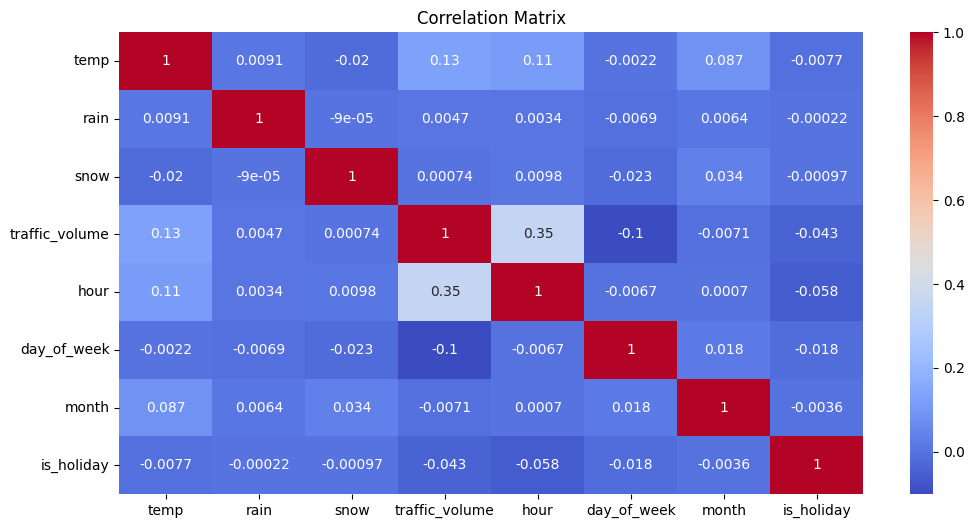

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import joblib

# Load dataset
df = pd.read_csv('traffic volume.csv')

# Handle missing values
df['temp'] = df['temp'].fillna(df['temp'].mean())
df['rain'] = df['rain'].fillna(df['rain'].mean())
df['snow'] = df['snow'].fillna(df['snow'].mean())
df['holiday'] = df['holiday'].fillna('None')
df['weather'] = df['weather'].fillna(df['weather'].mode()[0])

# Convert date and time to datetime
df['datetime'] = pd.to_datetime(df['date'] + ' ' + df['Time'])
df['hour'] = df['datetime'].dt.hour
df['day_of_week'] = df['datetime'].dt.dayofweek
df['month'] = df['datetime'].dt.month
df['is_holiday'] = df['holiday'].apply(lambda x: 0 if x == 'None' else 1)

# Features and target
features = ['temp', 'rain', 'snow', 'weather', 'hour', 'day_of_week', 'month', 'is_holiday']
X = df[features]
y = df['traffic_volume']

# Data visualization
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.savefig('correlation_matrix.png')

# Create preprocessing pipeline
numeric_features = ['temp', 'rain', 'snow', 'hour', 'day_of_week', 'month']
categorical_features = ['weather', 'is_holiday']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(drop='first', sparse=False), categorical_features)
    ])

# Create model pipeline
model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model.fit(X_train, y_train)

# Evaluate model
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f'R² Score: {r2:.4f}')
print(f'MAE: {mae:.4f}')
print(f'RMSE: {rmse:.4f}')

# Save model and preprocessor components
joblib.dump(model, 'model.pkl')
joblib.dump(preprocessor, 'preprocessor.pkl')

# Save feature names for Flask app
feature_names = X.columns.tolist()
joblib.dump(feature_names, 'feature_names.pkl')